# Simple Linear Regression

I will use Used Car Price Data from www.kaggle.com/ankits29/used-car-price-data to do simple linear regression.

In [1]:
#import required libraries

import pandas as pd

In [2]:
#read the data .csv file

df = pd.read_csv('car_data.csv')

In [3]:
#see the data head

pd.set_option('display.max_columns', None)
df.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.3


In [4]:
#see how many rows there are

df.shape

(2237, 9)

In [5]:
#drop duplicates

df.drop_duplicates(inplace=True)

In [6]:
#see how many rows there are after duplicates dropped

df.shape

(2237, 9)

In [7]:
#see correlation between variables

df.corr()

,Selling Price,Kilometers Driven,Year,Car Condition
Selling Price,1.000000,-0.163254,0.568156,0.435813
Kilometers Driven,-0.163254,1.000000,-0.427502,-0.450421
Year,0.568156,-0.427502,1.000000,0.649011
Car Condition,0.435813,-0.450421,0.649011,1.000000


For this multiple linear regression. let's use independent variables with highest correlation 'Year' and 'Car Condition'.

In [8]:
#import required libraries

from sklearn.linear_model import LinearRegression

In [31]:
#create object to select which variable will be used

Z = df[['Year', 'Car Condition']]

In [32]:
#create regression object and train it using selected variables

lm = LinearRegression()

lm.fit(Z, df['Selling Price'])

print('bo: ',lm.intercept_)
print('b1: ',lm.coef_)

bo:  -78730915.15364666
b1:  [39105.70488833 91450.36875289]


the regression model function is Price = -78730915.15364666 + 39105.70488833*Year + 91450.36875289*Car Condition

In [12]:
#import required libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [30]:
#make prediction using training independent values

Y_hat = lm.predict(Z)

We can't create regression plot or residual plot for multiple linear regression, so we use distribution plot instead.

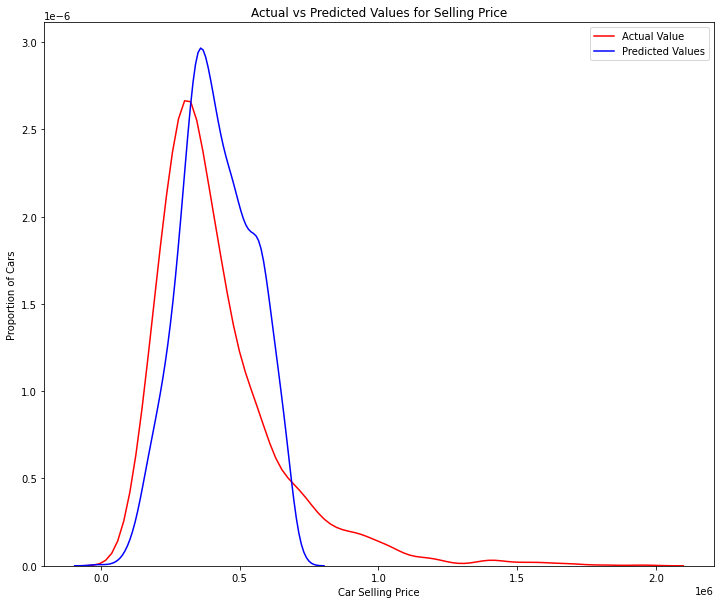

In [29]:
#plot distribution plot to know if our model is appropriate

plt.figure(figsize=(12, 10))

ax1 = sns.distplot(df['Selling Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)

plt.title('Actual vs Predicted Values for Selling Price')
plt.xlabel('Car Selling Price')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The predicted value distribution is kind of close to actual data value, but more improvement is needed.

Let's also include Kilometers Driven to second regression model

In [27]:
#make the second regression model

Z1 = df[['Kilometers Driven', 'Year', 'Car Condition']]
lm1 = LinearRegression()
lm1.fit(Z1, df['Selling Price'])
Y_hat1 = lm1.predict(Z1)

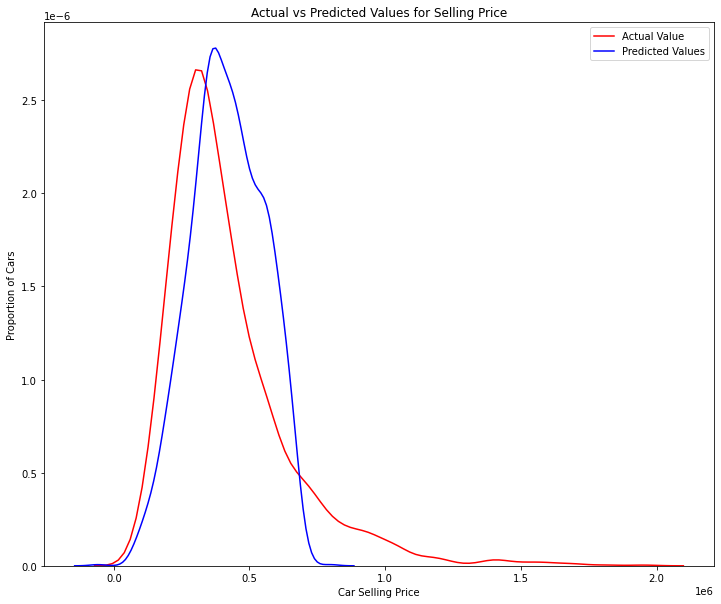

In [28]:
#plot distribution plot to know if our model is appropriate

plt.figure(figsize=(12, 10))

ax1 = sns.distplot(df['Selling Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat1, hist=False, color="b", label="Predicted Values" , ax=ax1)

plt.title('Actual vs Predicted Values for Selling Price')
plt.xlabel('Car Selling Price')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

The predicted value distribution is closer to actual data value, but still more improvement is needed.

In [21]:
#print R-square for in-sample measures

print('R-square of the first model: ', lm.score(Z, df['Selling Price']))
print('R-square of the second model: ', lm1.score(Z1, df['Selling Price']))

R-square of the first model:  0.3305739519156743
R-square of the second model:  0.34355259718213094


In [25]:
#print MSE for in-sample measures

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['Selling Price'], Y_hat)
mse1 = mean_squared_error(df['Selling Price'], Y_hat1)
print('Mean Square Error of the first model: ', mse)
print('Mean Square Error of the second model: ', mse1)

Mean Square Error of the first model:  34799632058.08121
Mean Square Error of the second model:  34124946510.39819


From in-sample evaluation above we can conclude that the second model is better because it has higher R-square and lower MSE.

Created by Muhammad Ilham